In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

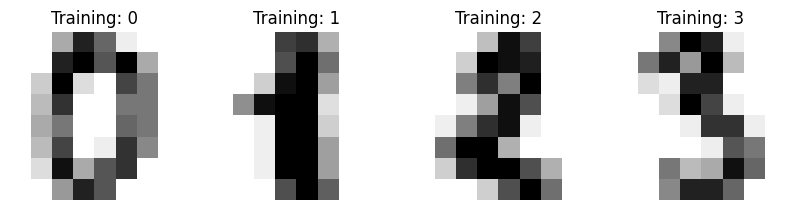

In [6]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [72]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False
)
kruns=[[]]
cls=[]
distance  = []
k = [1,3,5,100, 500]
count = [0,0,0,0,0,0,0,0,0,0] 
for o in X_test:
    for x, y in zip(X_train, y_train):
        dist = 0
        for g in range(0,len(x)):
            dist=dist+abs(x[g]-o[g])
        distance.append((y, dist))
    sorted_dist = sorted(distance, key =lambda x: x[1])
    distance = []
    for i in range(len(k)):
        for num in range(k[i]):
            count[sorted_dist[num][0]]=count[sorted_dist[num][0]]+1
        cl=np.argsort(count)
        cls.append(cl[9])
        kruns.append(cls)
        cls=[]
        for i in range(len(count)):
            count[i]=0
i=0
miss = 0
for y in y_test:
    print("true lable:" ,y ,"test labels: ", "k=1", kruns[0][i],"k=3", kruns[1][i],"k=5", kruns[2][i],"k=100", kruns[3][i],"k=500", kruns[4][i])
    i+1
  

        
    

IndexError: list index out of range